[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/khetansarvesh/Time-Series-Modelling/blob/main/FBProphet.ipynb)

Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.




# Installing FBprophet Package

In [ ]:
pip install pystan==2.19.1.1
## prophet is dependent on this library and hence you need to install this too to use prophet

In [ ]:
pip install prophet

     |████████████████████████████████| 65 kB 2.4 MB/s 
     |████████████████████████████████| 49 kB 5.5 MB/s 
     |████████████████████████████████| 43 kB 2.5 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6640407 sha256=aea29a878bfe3794c10db6534575346534c99cc360de5ac7d83525118adba87f
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


# Importing Libraries

In [ ]:
#importing library to print multiple lines in one code shell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#importing library to mount my google drive because dataset is uploaded in my google drive
from google.colab import drive
drive.mount('/content/drive/')

#importing library to deal with matrices
import numpy as np

#importing library to deal with csv file dataset
import pandas as pd

#importing library to do some math operations
import math
import random

#importing library used for plotting purpose
import matplotlib.pyplot as plt
%matplotlib inline

from prophet import Prophet

Mounted at /content/drive/


# Reading the dataset

In [ ]:
df = pd.read_csv('data.csv')
df = df.iloc[:,0:2]
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


# Fitting the Model

In [ ]:
model = Prophet()
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future_dates = model.make_future_dataframe(periods=365)

In [ ]:
future_dates.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [ ]:
forecast = model.predict(future_dates)

In [ ]:
forecast.head

<bound method NDFrame.head of              ds     trend  ...  multiplicative_terms_upper      yhat
0    2007-12-10  8.038509  ...                         0.0  8.841521
1    2007-12-11  8.036976  ...                         0.0  8.590090
2    2007-12-12  8.035443  ...                         0.0  8.385958
3    2007-12-13  8.033910  ...                         0.0  8.363878
4    2007-12-14  8.032377  ...                         0.0  8.351892
...         ...       ...  ...                         ...       ...
3265 2017-01-15  7.195686  ...                         0.0  8.213670
3266 2017-01-16  7.194670  ...                         0.0  8.538673
3267 2017-01-17  7.193654  ...                         0.0  8.326104
3268 2017-01-18  7.192638  ...                         0.0  8.158756
3269 2017-01-19  7.191622  ...                         0.0  8.170689

[3270 rows x 19 columns]>

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.213670,7.436672,8.940454
3266,2017-01-16,8.538673,7.765199,9.290668
3267,2017-01-17,8.326104,7.567881,9.077585
3268,2017-01-18,8.158756,7.495413,8.909668
3269,2017-01-19,8.170689,7.441601,8.896506


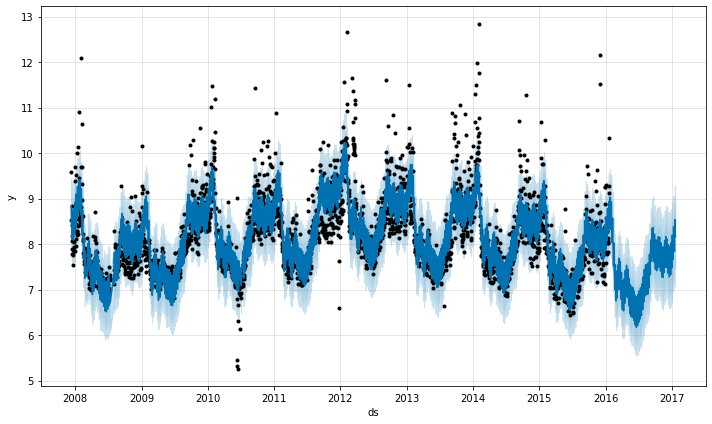

In [ ]:
fig1 = model.plot(forecast)

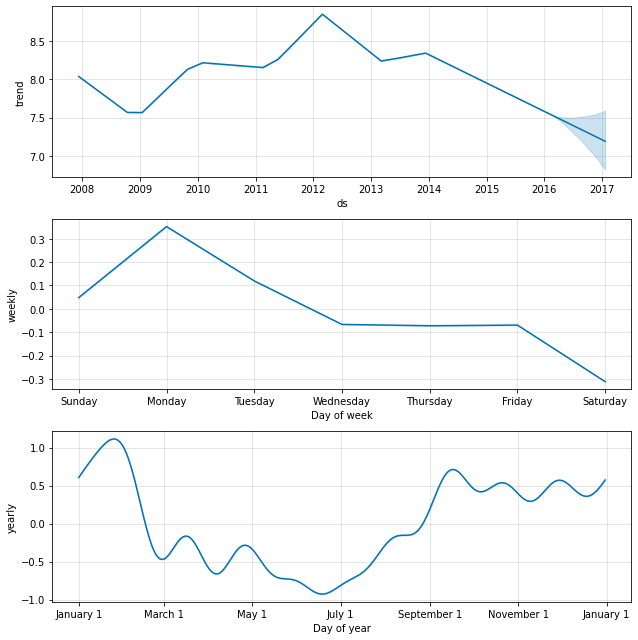

In [ ]:
# use this method to get the trimonthly, weekly and yearly trend
fig2 = model.plot_components(forecast)


In [ ]:
# to see all the functions available in this library use this
model.

In [ ]:
help(Prophet)

Help on class Prophet in module prophet.forecaster:

class Prophet(builtins.object)
 |  Prophet(growth='linear', changepoints=None, n_changepoints=25, changepoint_range=0.8, yearly_seasonality='auto', weekly_seasonality='auto', daily_seasonality='auto', holidays=None, seasonality_mode='additive', seasonality_prior_scale=10.0, holidays_prior_scale=10.0, changepoint_prior_scale=0.05, mcmc_samples=0, interval_width=0.8, uncertainty_samples=1000, stan_backend=None)
 |  
 |  Prophet forecaster.
 |  
 |  Parameters
 |  ----------
 |  growth: String 'linear' or 'logistic' to specify a linear or logistic
 |      trend.
 |  changepoints: List of dates at which to include potential changepoints. If
 |      not specified, potential changepoints are selected automatically.
 |  n_changepoints: Number of potential changepoints to include. Not used
 |      if input `changepoints` is supplied. If `changepoints` is not supplied,
 |      then n_changepoints potential changepoints are selected uniformly 